<div style="background-color: rgba(247, 200, 115, 0.3); padding: 30px 0;">
    <div style="max-width: 800px; margin: 0 auto; text-align: center;">
        <h1 style="font-size: 48px; color: #cc7a00; margin-bottom: 10px;">🚀 Machine Learning 📊</h1>
        <h3 style="font-size: 28px; color: #cc7a00; margin-bottom: 10px;">Linear Regression & Logestic Regression</h3>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://www.linkedin.com/in/mohammadreza-qaderi/" style="color: #1e90ff; text-decoration: none;">MohammadReza Qaderi</a></h4>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://github.com/MR-Qaderi/MachineLearningCourseMaterials" style="color: #1e90ff; text-decoration: none;">GitHub Repository</a></h4>
    </div>
</div>


<div align="center" style="border: 2px solid #e74c3c; padding: 10px; background-color: #f39c12; border-radius: 5px;">
  <h1 style="font-family: 'Palatino Linotype', serif; color: white;">🔥 Linear Regression 🔥</h1>
</div>

<img src="https://vidyasheela.com/web-contents/img/post_img/66/Linear-Regression-model.jpg" />
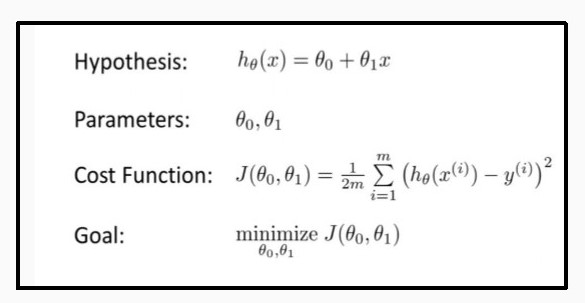

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

# Boston House Price Dataset

In [82]:
# Load the Boston Housing Price dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Property tax rate (full-value property tax rate per 10,000 dollar).
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
13. **LSTAT**: Percentage lower status of the population.
14. **MEDV**: Median value of owner-occupied homes in 1000s dollar (the target variable you want to predict).

In [83]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [84]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

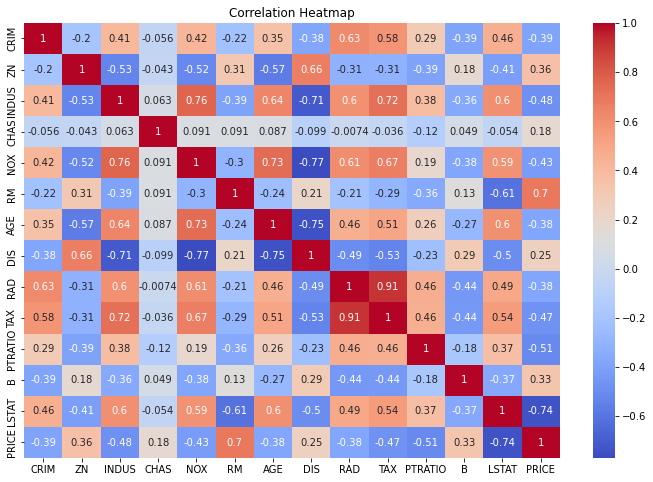

In [87]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Scatter Plot

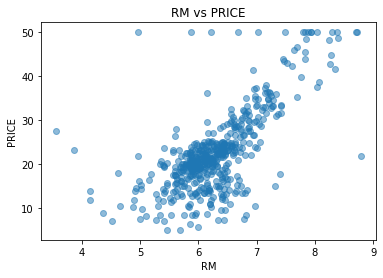

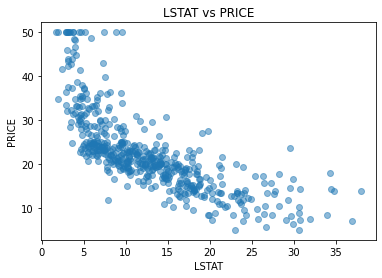

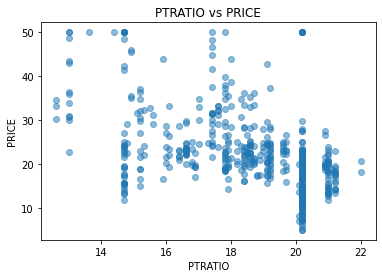

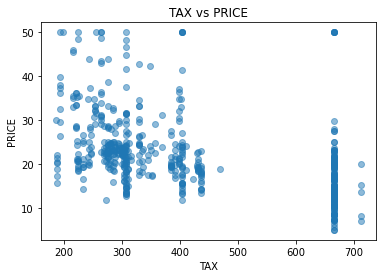

In [91]:
# Scatter plot of selected features against the target variable (PRICE)
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data['PRICE'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(f'{feature} vs PRICE')
    plt.show()

# Linear Regression

In [108]:
# Prepare data for simple linear regression
X_simple = data[['LSTAT']]
y = data['PRICE']

In [112]:
X_simple

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


## Split

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/train-and-test-datasets-in-machine-learning.png" />

In [113]:
# Split data into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [114]:
X_test_simple

,LSTAT
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27
...,...
412,34.37
436,18.05
411,21.22
86,12.86


## Simple Linear Regression Model

In [115]:
# Create and train the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

LinearRegression()

## Prediction

In [116]:
# Predict on the train set
y_pred_simple_train = simple_model.predict(X_train_simple)

In [117]:
# Predict on the test set
y_pred_simple_test = simple_model.predict(X_test_simple)

## Evaluation

In [118]:
# Calculate and print Mean Squared Error
mse_simple = mean_squared_error(y_train, y_pred_simple_train)
print(f"Simple Linear Regression - Mean Squared Error: {mse_simple:.2f}")

Simple Linear Regression - Mean Squared Error: 39.76


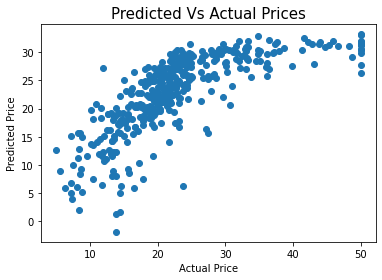

In [119]:
# visualizing the difference between the actual and predicted price 

plt.scatter(y_train, y_pred_simple_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

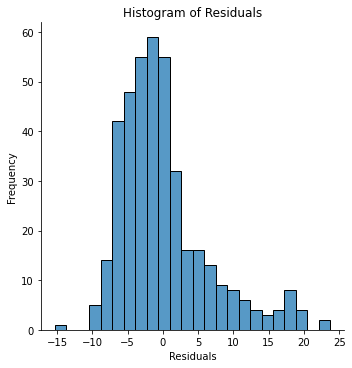

In [120]:
sns.displot(y_train - y_pred_simple_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Multiple Linear Regression

<img src="https://miro.medium.com/v2/resize:fit:1400/1*uLHXR8LKGDucpwUYHx3VaQ.png" width=75% />

In [123]:
# Prepare data for multiple linear regression
X_multiple = data[['RM', 'LSTAT', 'PTRATIO']]

In [124]:
X_multiple

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


## Split

In [125]:
# Split data into training and testing sets
X_train_multiple, X_test_multiple = train_test_split(X_multiple, test_size=0.2, random_state=42)

## Multiple Linear Regression Model

In [126]:
# Create and train the multiple linear regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train)

LinearRegression()

## Prediction

In [127]:
# Predict on the train set
y_pred_multiple_train = multiple_model.predict(X_train_multiple)

In [128]:
# Predict on the test set
y_pred_multiple_test = multiple_model.predict(X_test_multiple)

## Evaluation

In [129]:
# Calculate and print Mean Squared Error
mse_multiple = mean_squared_error(y_train, y_pred_multiple_train)
print(f"Multiple Linear Regression - Mean Squared Error: {mse_multiple:.2f}")

Multiple Linear Regression - Mean Squared Error: 27.24


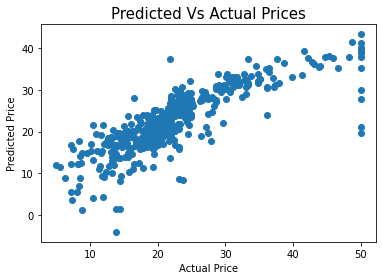

In [130]:
# visualizing the difference between the actual and predicted price 

plt.scatter(y_train, y_pred_multiple_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

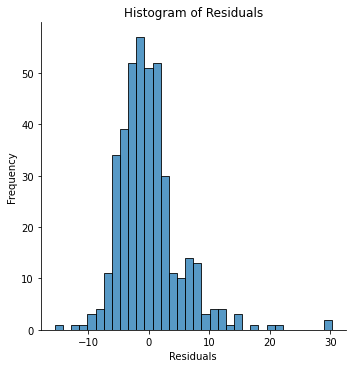

In [131]:
sns.displot(y_train - y_pred_multiple_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Multiple Linear Regression 2

In [133]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [135]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [136]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)

In [138]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
423,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64


In [139]:
# Create a Linear regressor
MLR = LinearRegression()

# Train the model using the training sets 
MLR.fit(X_train, y_train)

LinearRegression()

In [140]:
MLR.intercept_

37.51003619792189

In [141]:
MLR.coef_

array([-1.18901558e-01,  5.05689401e-02, -1.07427433e-02,  3.66184857e+00,
       -1.52957329e+01,  3.39316181e+00, -5.91222130e-03, -1.49234402e+00,
        3.33696220e-01, -1.50593743e-02, -8.69475207e-01,  8.80571095e-03,
       -4.92763225e-01])

In [142]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,MLR.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.118902
1,ZN,0.050569
2,INDUS,-0.010743
3,CHAS,3.661849
4,NOX,-15.295733
5,RM,3.393162
6,AGE,-0.005912
7,DIS,-1.492344
8,RAD,0.333696
9,TAX,-0.015059


In [143]:
# Model prediction on train data
y_pred = MLR.predict(X_train)

### Regression Evaluation Metrics

1. **R-squared (R²)**:
   R-squared measures the proportion of the variance in the dependent variable explained by the independent variables.

   **Formula**:
   R² = 1 - (SSR / SST)
   
   Where:
   - SSR: Sum of Squares Residual (sum of squared differences between actual and predicted values)
   - SST: Total Sum of Squares (sum of squared differences between actual values and mean of actual values)
   
   **Interpretation**:
   - R² ranges from 0 to 1.
   - Larger R² values indicate a better fit, suggesting that the model explains more variability in the data.

2. **Mean Absolute Error (MAE)**:
   MAE calculates the average absolute difference between actual and predicted values.

   **Formula**:
   MAE = (1 / n) * Σ|actual - predicted|
   
   Where:
   - n: Number of data points
   - Σ: Sum over all data points

   **Interpretation**:
   - MAE measures the magnitude of errors.
   - Smaller MAE values are better, as they indicate lower average error.

3. **Mean Squared Error (MSE)**:
   MSE calculates the average of the squared differences between actual and predicted values.

   **Formula**:
   MSE = (1 / n) * Σ(actual - predicted)²

   **Interpretation**:
   - MSE penalizes larger errors more heavily.
   - Smaller MSE values are better, indicating better overall accuracy.

4. **Root Mean Squared Error (RMSE)**:
   RMSE is the square root of the MSE, providing error magnitude in the same units as the target variable.

   **Formula**:
   RMSE = √MSE

   **Interpretation**:
   - Like MSE, RMSE penalizes larger errors more.
   - Smaller RMSE values are better, indicating better accuracy.

Remember that the interpretation of these metrics depends on the context and goals of your analysis. Choose the metric that aligns with your specific needs and the characteristics of your regression problem.


In [149]:
# Calculate the model evaluation metrics
r2 = metrics.r2_score(y_train, y_pred)
mae = metrics.mean_absolute_error(y_train, y_pred)
mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

# Create a list of metric names and their corresponding values
metrics_list = [
    ["R^2", r2],
    ["MAE", mae],
    ["MSE", mse],
    ["RMSE", rmse]
]

# Display the metrics in a table
table = tabulate(metrics_list, headers=["Metric", "Value"], tablefmt='grid')
print(table)

+----------+-----------+
| Metric   |     Value |
+==========+===========+
| R^2      |  0.737523 |
+----------+-----------+
| MAE      |  3.15134  |
+----------+-----------+
| MSE      | 20.5493   |
+----------+-----------+
| RMSE     |  4.53313  |
+----------+-----------+


In [150]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7375227021436395
MAE: 3.1513405556701346
MSE: 20.54926467081804
RMSE: 4.533129677255885


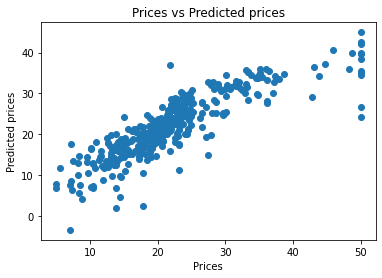

In [151]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

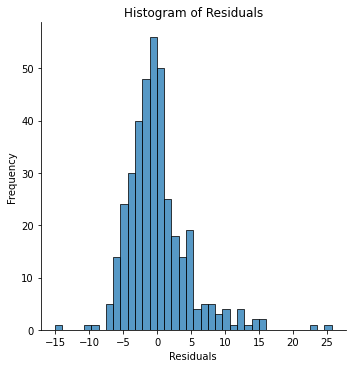

In [152]:
sns.displot(y_train - y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

<div align="center" style="border: 2px solid #e74c3c; padding: 10px; background-color: #f39c12; border-radius: 5px;">
  <h1 style="font-family: 'Palatino Linotype', serif; color: white;">🔥 Logistic regression 🔥</h1>
</div>

### Logistic Regression

**Logistic Regression** is a statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes or classes. Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm.

In Logistic Regression, the output is transformed using the logistic function (also known as the sigmoid function) to map the predicted values between 0 and 1, representing the probability of belonging to the positive class. The logistic function models the relationship between the input features and the probability of the target class.

Logistic Regression is widely used for problems such as:
- Email spam detection (spam or not spam)
- Disease diagnosis (presence or absence of a disease)
- Customer churn prediction (churn or not churn)


<img src="https://images.datacamp.com/image/upload/v1660054820/Regression_charts_b9de7355cf.png" width=75% />
<img src= "https://www.saedsayad.com/images/LogReg_1.png">

## Iris Dataset

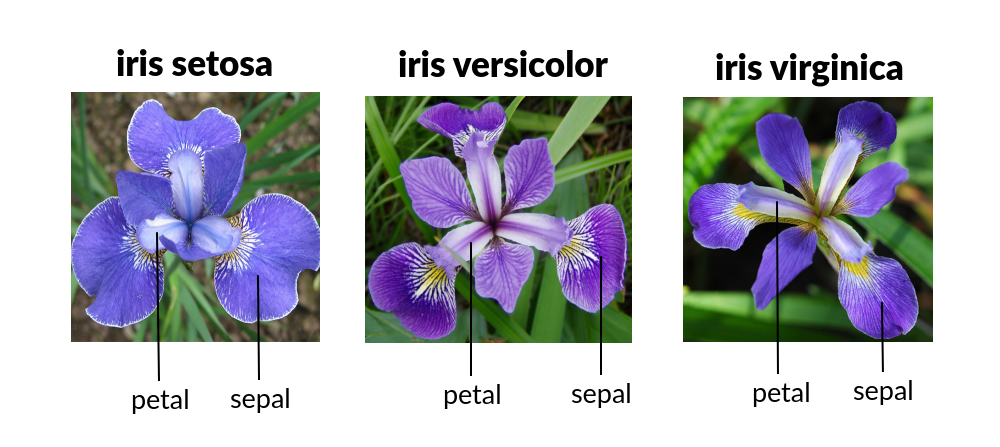

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [5]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.drop("Id", axis=1, inplace = True)

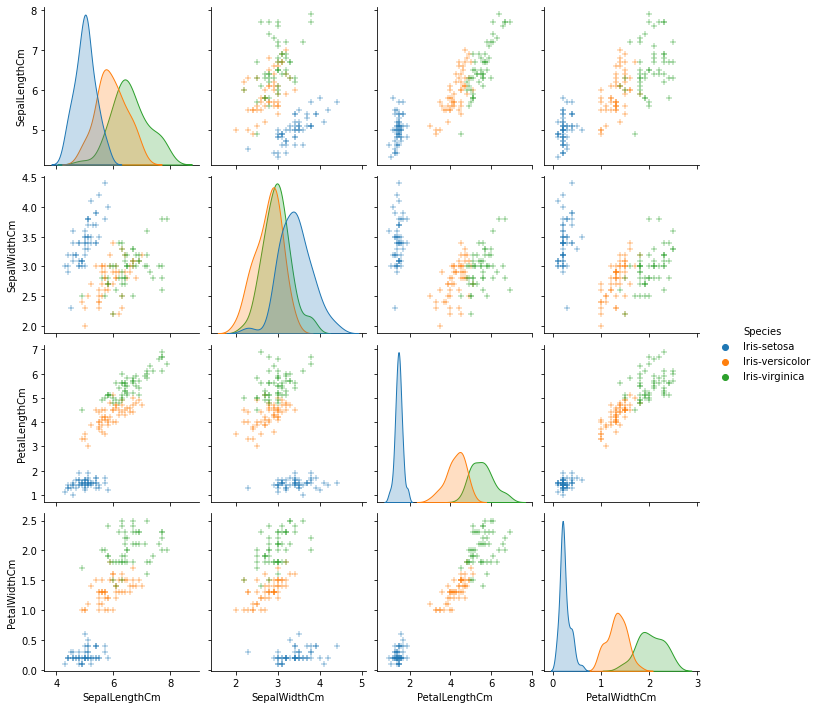

In [8]:
pair = sns.pairplot(iris, hue='Species', markers='+')
plt.show()

<AxesSubplot:>

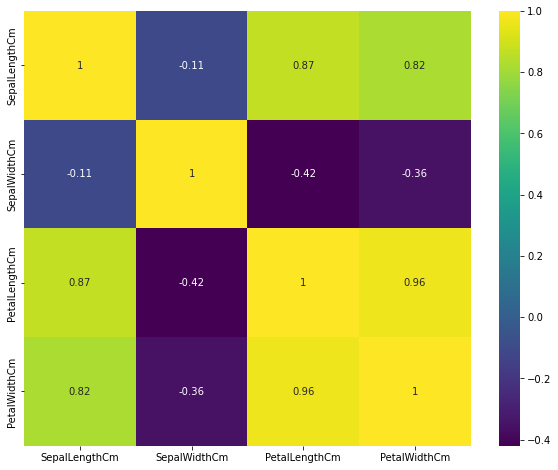

In [9]:
corr = iris.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, cmap='viridis', annot=True)

In [10]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Logestic Regression Model

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Prediction

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.9666666666666667


In [21]:
pd.crosstab(logreg.predict(X),y)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,50,0,0
Iris-versicolor,0,47,0
Iris-virginica,0,3,50


## Logestic Regression 2 

In [22]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Convert the data to a Pandas DataFrame for EDA
data = pd.DataFrame(data=X, columns=feature_names)
data['target'] = y

In [23]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


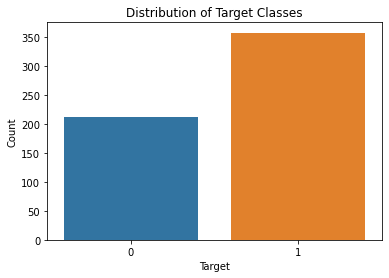

In [24]:
# Visualize the distribution of target classes
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Split

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

In [30]:
# Create a Logistic Regression model
model = LogisticRegression()

In [31]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

## Prediction

In [32]:
# Predict the classes on the testing data
y_pred = model.predict(X_test)

## Evaluation

In [33]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96
